In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# df = pd.read_csv("/home/rafael/git/projeto_bom_pagador/dataset/banco_original.csv", index_col="ID")
df = pd.read_csv("/home/rafael/git/projeto_bom_pagador/dataset/base_balanceada.csv", index_col="ID")

In [14]:
x = df.drop('Situacao', axis=1)
y = df['Situacao']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
clf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=0)
clf.fit(x_train, y_train)
resul = clf.predict(x_test)
accuracy_score(y_test, resul)*100

55.107713690062546

Para analisar o efeito das diversas técnicas vamos plotar um curva de aprendizado visando identificar score in (conjunto de treinamento), score out (conjunto de teste), variância, e generalização do modelo. Essa abordagem é construída com base no learning_curve do pacote sklearn.model_selection.

https://medium.com/@luanoliveira1992/predi%C3%A7%C3%A3o-em-bases-desbalanceadas-com-aux%C3%ADlio-do-imbalanced-learn-fbb0bfa57523

In [22]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
def plot_learning_curve(estimator, X, y, cv=None):
    
    # O gráfico é inicializado com as características principais
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    # Calculamos os valores da curva de aprendizado, acrescentando os dados de 10 em 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes, cv=cv)
    
    # Tiramos a média e o desvio padrão de cada sequência de testes. 
    # Por padrão é feita validação cruzada em 3 conjuntos de dados.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    # O desempenho de treinamento fica em vermelho e o de validação em verde
    plt.plot(points, mean_in, 'o-', color='red', label='Treinamento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    
    # Os desvios ficam ao redor das linhas para indicar a variação no aprendizado
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

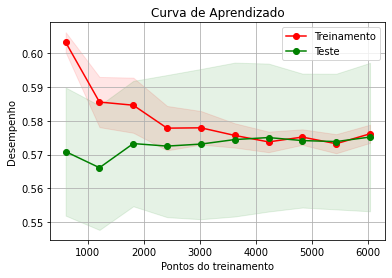

In [29]:
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, x_train, y_train, cv=10);

<module 'matplotlib.pyplot' from '/home/rafael/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

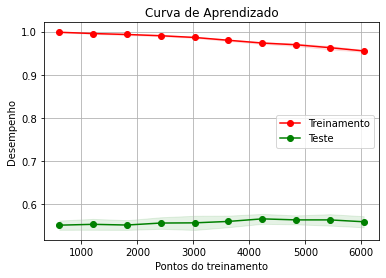

In [30]:
plot_learning_curve(clf, x_train, y_train, cv=10);